# [Math behind the RIDGE Regularization](https://youtu.be/oDlZBQjk_3A?list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH)

**Pre-requisite:**  [Math_behind_simple_linear_regression.ipynb](../../../1_LinearRegression/1_SimpleLinearRegression/1.2_SLR_Math.ipynb)
<br>
**Assumptions**  
* the data is overfitted. <br>

**known:**
*  method to reduce overfitting is to reduce the value of coefficients (in SLR its m), because higher coefficients value means that model is trying to touch every single training data point.
*  Done by adding a constant to error function from which values of m and b are calculated. if the data is 2D(just for now will learn for nD as well) the constant being added will be (`lambda(m^2)`). Adding this reduces the value of loss function.

---

![ytss](assets/math1.png)  
invisible term at the top right corner is `lambda(m^2)`

![ytss](assets/math2.png)
<br><br>
Now we know why adding a lambda in the loss function decreases the value of m because it increases the value of denominator ulimately decresing the whole value. Now this lambda (called alpha as parameter in Ridge class) is a hyperparameter. if its set to 0. it will be just the same as Linear Regression, no change. 

## Code

In [3]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,noise=20,n_targets=1,random_state=13)

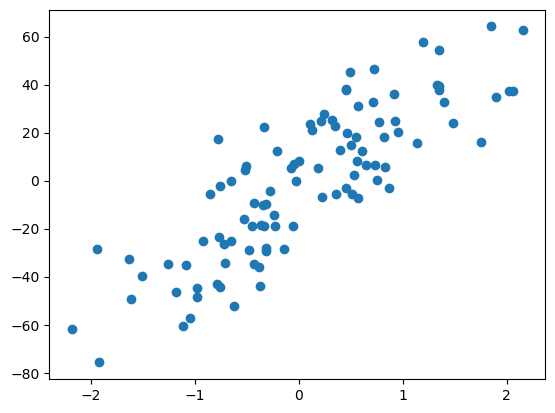

In [5]:
plt.scatter(X,y)

In [7]:
# lets get linear regression  results for later refrence
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [12]:
# and ridge regression too
from sklearn.linear_model import Ridge
ri = Ridge(alpha=10) 
ri.fit(X,y)
print(ri.coef_)
print(ri.intercept_)

[24.9546267]
-2.1269130035235726


In [13]:
ri2 = Ridge(alpha=100) 
ri2.fit(X,y)
print(ri.coef_)
print(ri.intercept_)

[24.9546267]
-2.1269130035235726


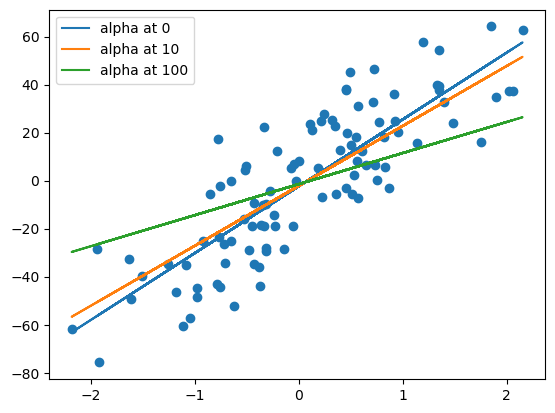

In [17]:
# just to see the model lines let's plot 3 different alpha valued ridges.
plt.scatter(X,y)
plt.plot(X,lr.predict(X),label='alpha at 0') # ridge with alpha 0 is same as lr
plt.plot(X,ri.predict(X),label='alpha at 10')
plt.plot(X,ri2.predict(X),label='alpha at 100')
plt.legend()
plt.show()

# can be seen increasing value of alpha does decrease the slope

In [66]:
class Manual_Ridge:
    def __init__(self,alpha):
        self.alpha = alpha
        self.m = None
        self.b = None
    def fit(self,X,y):
        num,den = (0,0) 
        for i in range(X.shape[0]):
            num += (y[i] - y.mean())*( X[i] - X.mean())
            den += (X[i] - X.mean())**2

        self.m = num/(den + self.alpha)
        self.b = y.mean() - (self.m*X.mean())
        print(self.m,"\n",self.b)
    def predict(X_test):
        pass

In [67]:
mr = Manual_Ridge(100)
mr.fit(X,y) #got the same thang

[12.93442104] 
 [-1.42484415]


In [34]:
X.mean()

np.float64(0.058407391146876896)